<h1>Лабораторна робота 6</h1>
<h3>Лобунько Д.О, Обробка та аналіз БМД, БС-81</h3>

Обрати реальні дані з kaggle або сгенерувати випадкові дані. Дані мають відповідати вимогам викладеним вище. Формат даних:

| Група 1 | Група 2  | 
| ------------- |--------- |
| $k_{1}  $   | $k_{2}$   |
| $...$   | $...$   |
| $k_{1n}$   | $k_{2n}$   |

In [1]:
import pandas as pd
import seaborn as sns
from math import sqrt


perfomance = pd.read_csv("StudentsPerformance.csv")
perfomance

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [2]:
table = pd.DataFrame(columns=["Reading", "Writing"], index=[i+1 for i in range(len(perfomance))])
table["Reading"] = perfomance["reading score"]
table["Writing"] = perfomance["writing score"]
table.index.name = "Student"
table

,Reading,Writing
Student,,
1,90.0,88.0
2,95.0,93.0
3,57.0,44.0
4,78.0,75.0
5,83.0,78.0
...,...,...
996,55.0,55.0
997,71.0,65.0
998,78.0,77.0


Побудувати графік, що відображає розкид даних в групах. Приклад:
![alt text](https://s3.amazonaws.com/libapps/accounts/2515/images/spss_paired-t_example_boxplot.PNG)

[Text(0.5, 0, 'Score')]

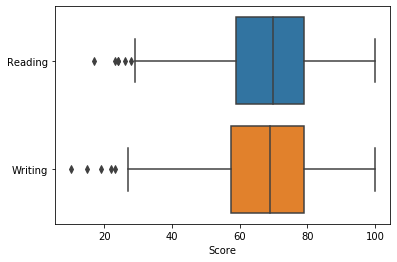

In [3]:
sns.boxplot(data=table, orient='h').set(xlabel="Score")

Написати функції:
* для оцінки зв'язку між групами за коефіцієнтом кореляції Пірсона. Функція має повертати значення коефіцієнту кореляції, значення ступеня свободи та результат оцінки значимості зв'зку (significant або not significant).
* для визначення відмінності між групами за критерієм Стьюдента. Функція має повертати значення критерію Стьюдента,значення ступеня свободи та результат оцінки значимості зв'зку (significant або not significant).

In [4]:
def Pearson(table):
    keys = table.keys()
    n = len(table)
    r_numerator = (n*sum(table[keys[0]]*table[keys[1]]))-(sum(table[keys[0]])*sum(table[keys[1]]))
    r_denominator = sqrt(((n*sum(table[keys[0]]**2))-(sum(table[keys[0]])**2))*
                         ((n*sum(table[keys[1]]**2))-(sum(table[keys[1]])**2)))
    r = r_numerator/r_denominator
    df = n-2
    correlation_table = pd.read_excel("Correlation.xlsx")
    r_table = 0
    i = 0
    while ((i < len(correlation_table)-1) and (df > correlation_table.iloc[i,0])):
        r_table = correlation_table.iloc[i,1]
        i += 1
    if (df < correlation_table.iloc[i-1,0]):
        if (abs(df-correlation_table.iloc[i-1,0])>abs(df-correlation_table.iloc[i,0])):
            r_table = correlation_table.iloc[i,1]
    
    return r, df, "significant" if abs(r) > r_table else "not significant"

In [5]:
def Student(table):
    keys = table.keys()
    n = len(table)
    mean = (table[keys[0]]-table[keys[1]]).mean()
    std = (table[keys[0]]-table[keys[1]]).std()
    t = (mean/std)*sqrt(n)
    df = n-1
    Student_table = pd.read_excel("Student.xlsx")
    t_table = 0
    i = 0
    while ((i < len(Student_table)-1) and (df > Student_table.iloc[i,0])):
        t_table = Student_table.iloc[i,1]
        i += 1
    if (abs(df-Student_table.iloc[i-1,0])>abs(df-Student_table.iloc[i,0])):
        t_table = Student_table.iloc[i,1]
    
    return t, df, "significant" if abs(t) > t_table else "not significant"

Перевірити розбіжність на між групами на даних з п. 1. 

In [6]:
Pearson(table)

(nan, 998, 'not significant')

In [7]:
Student(table)

(7.807165320258078, 999, 'significant')

Сформувати висновок про взаємозв'язок між групами та про їх розбіжність.

<p>Отриманий коефіціент кореляції між двома групами дорівнює ≈0.95, що виявився більше за відповідне табличне значення при кількості ступенів свободи df = 998, що свідчить про високу статистичну залежність.</p>
<p>Отримане значення t-критерію Стьюдента рівне ≈7.79, що виявилося більше за відповідне табличне значення при кількості ступенів свободи df=999, через що була прийнята альтернативна гіпотеза про відмінність в середніх.</p>